<a href="https://colab.research.google.com/github/smwongela/Linear-Regression-Python/blob/master/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
#@title Define the DataSet
my_feature =([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label=([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model



In [ ]:
def train_model(model,feature,label,epochs,batch_size):
  """Train the model by feeding it data."""
   # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature, y=label,batch_size=batch_size,epochs=epochs)
  
  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias=model.get_weights()[1]
    # The list of epochs is stored separately from the 
  # rest of history.
  epochs=history.epoch

   # Gather the history (a snapshot) of each epoch.
  hist=pd.DataFrame(history.history)
   # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

  print("Defined create_model and train_model")



In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
 """Plot the trained model against the training feature and label."""
 # Label the axis
 plt.xlabel("feature")
 plt.ylabel("label")

 # Plot the faeature values vs. label values.
 plt.scatter(feature, label)

 #  Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
 x0 = 0
 y0 = trained_bias
 x1 = my_feature[-1]
 y1= trained_bias+(trained_weight* x1)
 plt.plot([x0,x1],[y0,y1], c='r')
   # Render the scatter plot and the red line.
 plt.show()
def plot_the_loss_curve(epochs,rmse):
  """plot the loss curve, which shows loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97,rmse.max()])
  plt.show()
  
  print("Definet the plot_the_model and plot_the_loss_curve functions.")


Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 1113.8644 - root_mean_squared_error: 33.3746
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 792.8398 - root_mean_squared_error: 28.1574
Epoch 3/70
1/1 [==============================] - 0s 1ms/step - loss: 609.6953 - root_mean_squared_error: 24.6920
Epoch 4/70
1/1 [==============================] - 0s 983us/step - loss: 482.4150 - root_mean_squared_error: 21.9639
Epoch 5/70
1/1 [==============================] - 0s 986us/step - loss: 386.8714 - root_mean_squared_error: 19.6690
Epoch 6/70
1/1 [==============================] - 0s 1ms/step - loss: 312.2398 - root_mean_squared_error: 17.6703
Epoch 7/70
1/1 [==============================] - 0s 1ms/step - loss: 252.5912 - root_mean_squared_error: 15.8931
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 204.2629 - root_mean_squared_error: 14.2921
Epoch 9/70
1/1 [==============================] - 0s 1ms/step - loss: 164.7986 - ro

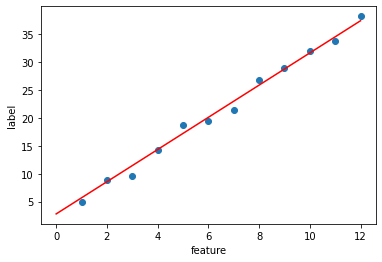

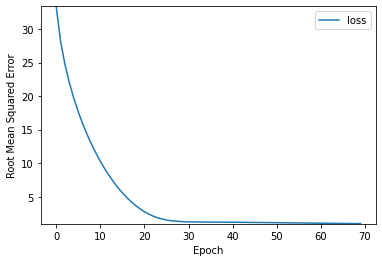

Definet the plot_the_model and plot_the_loss_curve functions.


In [ ]:
#@title Specify the hyperparameters
learning_rate=0.20
epochs=70
my_batch_size=12

my_model =  build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias,my_feature, my_label)
plot_the_loss_curve(epochs,rmse)